In [18]:
import pandas as pd
import scipy as sp
import numpy as np

In [6]:
df = pd.read_csv('hypothesis_2.csv', header=None)
df

,0
0,2
1,3
2,5
3,3
4,4
...,...
95,10
96,4
97,0
98,4


0
0      7/100
1       7/50
2       9/50
3     21/100
4       3/20
5       3/25
6      9/100
7      3/100
10     1/100
Name: proportion, dtype: object
x: [ 0.    1.25  2.5   3.75  5.    6.25  7.5   8.75 10.  ]
y: [0.21 0.39 0.6  0.75 0.87 0.96 0.99 0.99 1.  ]
D-statistic: 0.37
p-value: 8.631287196007263e-13
rho: 3.7
Гипотеза отвергается


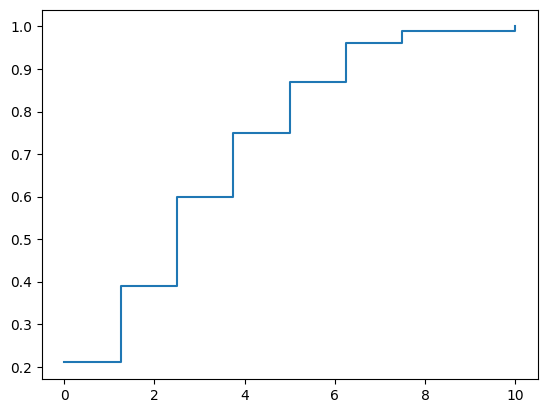

In [48]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from fractions import Fraction

# Чтение данных
url = "https://studio.openedu.ru/assets/courseware/v1/6ea47ed325da363ccbb5ac148f2ddfc0/asset-v1:ITMOUniversity+ELSTATAN+fall_2021_ITMO+type@asset+block/hypothesis_2.csv"
data = pd.read_csv(url, header=None)
sample = data[0]

# Расчет таблицы распределения
distribution_table = pd.Series(sample).value_counts(normalize=True).apply(lambda x: Fraction(x).limit_denominator()).sort_index()
print(distribution_table)

# Функция эмпирического распределения
ecdf = stats.cumfreq(sample, numbins=len(np.unique(sample)), defaultreallimits=(sample.min(), sample.max()))
x = np.linspace(sample.min(), sample.max(), num=len(ecdf.cumcount))
y = ecdf.cumcount / len(sample)

# Вывод значений функции распределения
print("x:", x)
print("y:", y)


# Проверка гипотезы с использованием критерия Колмогорова-Смирнова
D, p_value = stats.kstest(sample, 'uniform', args=(0, 10))
print("D-statistic:", D)
print("p-value:", p_value)

# Определение и вывод результатов проверки гипотезы
C = 1.36
rho = np.sqrt(len(sample)) * D
print("rho:", rho)

if rho > C:
    print("Гипотеза отвергается")
else:
    print("Гипотеза не отвергается")

# Построение графика функции
plt.step(x, y, where='post')
plt.show()

Пояснения к коду:
1. Чтение данных: данные считываются из CSV-файла по URL. В pandas нет аналога функции header=F, так что в read_csv мы передаем header=None.
2. Распределение: расчет процентного распределения значений и приведение долей к несократимым дробям для имитации поведения функции fractions из R.
3. Функция эмпирического распределения: в Python она создается через cumfreq из scipy.stats.
4. Построение графика функции: используется matplotlib.pyplot для визуализации функции эмпирического распределения.
5. Проверка гипотезы: использование критерия Колмогорова-Смирнова для сравнения эмпирического распределения с равномерным распределением. Расчет статистики ρ и сравнение ее с критическим значением C.

In [3]:
X = pd.read_csv('hypothesis_5_X.csv', header=None)
Y = pd.read_csv('hypothesis_5_Y.csv', header=None)

In [4]:
X

,0
0,35.857419
1,29.851216
2,25.991484
3,34.426247
4,33.322775
5,36.441769
6,27.858808
7,31.017693
8,26.438346
9,30.520649


In [5]:
Y

,0
0,38.829230
1,32.936778
2,39.731949
3,37.074383
4,33.338638
5,35.652129
6,33.100469


In [9]:
# проверка критерия колмогорова 0.05 на равномерное распределение
res = sp.stats.kstest(Y[0], 'uniform')
print(res)
# значение функции отклонения
res[0]


KstestResult(statistic=1.0, pvalue=0.0, statistic_location=32.9367778501473, statistic_sign=-1)


1.0

In [42]:
nX = len(X)
nY = len(Y)

rho = abs(np.sqrt(nX * nY / (nX + nY)) * (X.mean() - Y.mean()) / np.sqrt(((nX - 1) * X.var() + (nY - 1) * Y.var()) / (nX + nY - 2)))[0]
rho

2.753039845218725

In [43]:
# вычислим квантиль уровня 1 - 0.05 / 2 распределения Стьюдента 
e = 0.05

C = sp.stats.t.ppf(1 - e / 2, nX + nY - 2)
C

2.131449545559323

In [44]:
if rho > C :
    print("Гипотеза отвергается")
else:
    print("Гипотеза не отвергается")


Гипотеза отвергается


In [49]:
X = pd.read_csv('hypothesis_6_X.csv', header=None)
Y = pd.read_csv('hypothesis_6_Y.csv', header=None)

In [55]:
X = pd.read_csv('hypothesis_4.csv', header=None)
X.mean()

0    29.321467
dtype: float64

In [56]:
(X.mean() - 26) * np.sqrt(10) / np.sqrt(6)

0    4.287996
dtype: float64

In [59]:
X = pd.read_csv('Hypothesis_1_14.csv', header=None)
X

,0
0,95.096
1,85.895
2,86.487
3,84.948
4,72.873
5,86.304


In [62]:
X.mean()

0    85.267167
dtype: float64

In [65]:
# оценка среднеквадратичного отклонения
X.std()

0    7.117308
dtype: float64

In [69]:
# значение модуля функции отклонения
abs((X.mean() - 87) * np.sqrt(len(X)) / X.std())

0    0.596371
dtype: float64

In [68]:
# вычислим квантиль уровня 1 - 0.01 / 2 распределения Стьюдента
e = 0.01

C = sp.stats.t.ppf(1 - e / 2, len(X) - 1)
C

4.032142983557536

In [70]:
X = np.array([13, 4, 11, 20])
Y = np.array([8, 5, 6, 15])

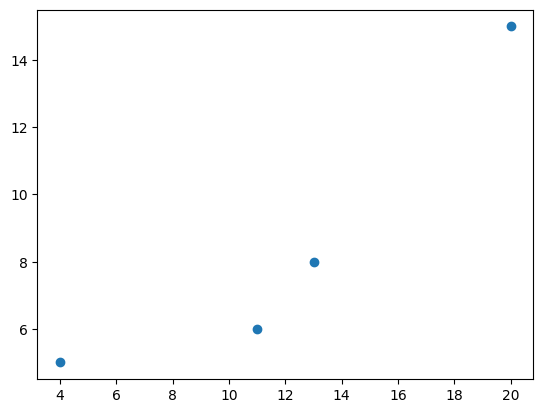

In [72]:
import matplotlib.pyplot as plt
plt.plot(X, Y, 'o')

In [73]:
Ex = X.mean()
Ex

12.0

In [74]:
Ey = Y.mean()
Ey

8.5

In [78]:
# линейная регрессия
a = np.sum((X - Ex) * (Y - Ey)) / np.sum((X - Ex) ** 2)
a

0.6307692307692307

In [80]:
b = Ey - a * Ex
b

0.930769230769231

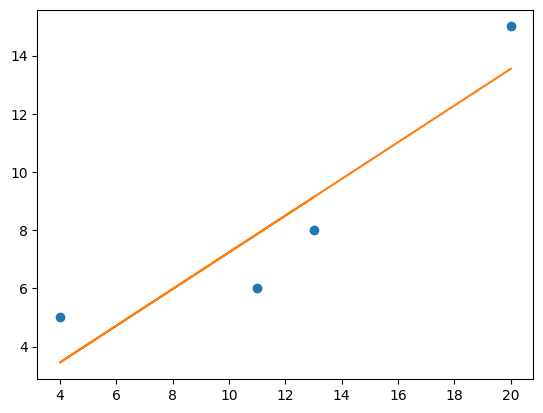

In [81]:
plt.plot(X, Y, 'o')
plt.plot(X, a * X + b)

In [88]:
# вычислим квантиль уровня 1 - 0.05 / 2 распределения Стьюдента
e = 0.05

C = sp.stats.t.ppf(1 - e / 2, len(X) - 2)
C

4.302652729696142

In [133]:
# оценка стандартной ошибки
RSE = np.sqrt(np.sum((Y - a * X - b) ** 2) / (len(X) - 2))
RSE

2.153708786828326

In [134]:
SEb = RSE * np.sqrt(1 / len(X) + Ex ** 2 / np.sum((X - Ex) ** 2))
SEb

2.5095026499878137

In [135]:
SEa = RSE / np.sqrt(np.sum((X - Ex) ** 2))
SEa

0.18889275627397964

In [127]:
# оценка доверительного интервала

# нижняя г
b - C * SEb

-9.866749196380537

In [128]:
# верхняя г
b + C * SEb

11.728287657919

In [129]:
# нижняя г
a - C * SEa

-0.18197070263283577

In [130]:
# верхняя г
a + C * SEa

1.4435091641712972

In [131]:
t = a / SEa
t

3.3392981457390087

In [136]:
R2 = 1 - np.sum((Y - a * X - b) ** 2) / np.sum((Y - Ey) ** 2)
R2

0.8479192938209331

In [137]:
x1 = np.array([1, 3, -5, 7])
x2 = np.array([2, -4, 0, 8])

In [139]:
# эвклидово расстояние
dE = np.sqrt(np.sum((x1 - x2) ** 2))
dE

8.717797887081348

In [140]:
# манхэттенское расстояние
dM = np.sum(np.abs(x1 - x2))
dM

14

In [141]:
# расстояние Чебышева
dC = np.max(np.abs(x1 - x2))
dC

7

In [143]:
df = pd.read_csv('knnOpros.csv')
df

,id,X,Y,Class
0,1,28,10,1
1,2,49,49,1
2,3,48,35,0
3,4,36,33,1
4,5,45,54,0


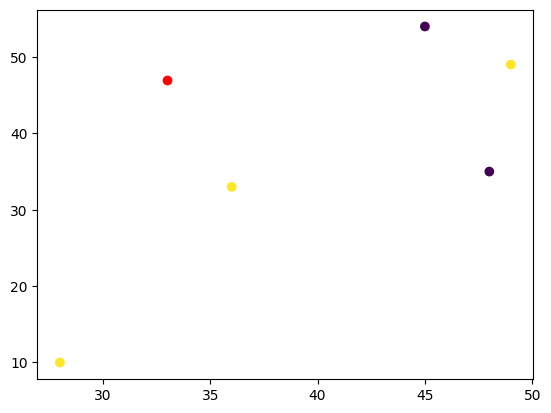

In [149]:
# вывести в зависимости от класса разными цветами
plt.scatter(df['X'], df['Y'], c=df['Class'])
# вывести точку с координатами (3, 4) красным цветом
plt.scatter(33, 47, color='red')

In [151]:
# вычислим евклидово расстояние от точки (33, 47) до всех точек
df['dE'] = np.sqrt((df['X'] - 33) ** 2 + (df['Y'] - 47) ** 2)

In [152]:
# вычислим манхетовское расстояние от точки (33, 47) до всех точек
df['dM'] = np.abs(df['X'] - 33) + np.abs(df['Y'] - 47)

In [153]:
# вычислим расстояние Чебышева от точки (33, 47) до всех точек
df['dC'] = np.maximum(np.abs(df['X'] - 33), np.abs(df['Y'] - 47))

In [155]:
df

,id,X,Y,Class,dE,dM,dC
0,1,28,10,1,37.336309,42,37
1,2,49,49,1,16.124515,18,16
2,3,48,35,0,19.209373,27,15
3,4,36,33,1,14.317821,17,14
4,5,45,54,0,13.892444,19,12
